text representation; evaluation silhouette, topic modeling barra di completamento

# Text Mining and Search Project

**Martina Pantò - 901346**

**Alessandro Bosi - 837381**

Dialogue Lines from all 27 seasons of The Simpsons

This dataset contains the characters, locations, episode details, and script lines for approximately 600 Simpsons episodes, dating back to 1989. More than 150k lines of dialogues with the text spoken during each episode and who said it.

# Preprocessed dataset upload

In [ ]:
import pandas as pd

In [ ]:
# to import data
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/TextMiningProject/df_preprocessed.csv")
df

,character,spoken_words,dialogue_index,character_normalized,normalized_text,tokens,clean_text,clean_tokens,lemmatized_tokens,final_text
0,Miss Hoover,"No, actually, it was a little of both. Sometim...",1,miss_hoover,no actually it was a little of both sometimes ...,"['no', 'actually', 'it', 'was', 'a', 'little',...",no actually little sometimes disease magazines...,"['no', 'actually', 'little', 'sometimes', 'dis...","['no', 'actually', 'little', 'sometimes', 'dis...",no actually little sometimes disease magazine ...
1,Lisa Simpson,Where's Mr. Bergstrom?,1,lisa_simpson,wheres mr bergstrom,"['wheres', 'mr', 'bergstrom']",wheres mr bergstrom,"['wheres', 'mr', 'bergstrom']","['wheres', 'mr', 'bergstrom']",wheres mr bergstrom
2,Miss Hoover,I don't know. Although I'd sure like to talk t...,1,miss_hoover,i dont know although id sure like to talk to h...,"['i', 'dont', 'know', 'although', 'id', 'sure'...",dont know although id sure like talk didnt tou...,"['dont', 'know', 'although', 'id', 'sure', 'li...","['dont', 'know', 'although', 'id', 'sure', 'li...",dont know although id sure like talk didnt tou...
3,Lisa Simpson,That life is worth living.,1,lisa_simpson,that life is worth living,"['that', 'life', 'is', 'worth', 'living']",life worth living,"['life', 'worth', 'living']","['life', 'worth', 'living']",life worth living
4,Edna Krabappel-Flanders,The polls will be open from now until the end ...,1,edna_krabappelflanders,the polls will be open from now until the end ...,"['the', 'polls', 'will', 'be', 'open', 'from',...",polls open end recess case decided put thought...,"['polls', 'open', 'end', 'recess', 'case', 'de...","['poll', 'open', 'end', 'recess', 'case', 'dec...",poll open end recess case decided put thought ...
...,...,...,...,...,...,...,...,...,...,...
131848,Miss Hoover,I'm back.,17813,miss_hoover,im back,"['im', 'back']",im back,"['im', 'back']","['im', 'back']",im back
131849,Miss Hoover,"You see, class, my Lyme disease turned out to ...",17813,miss_hoover,you see class my lyme disease turned out to be,"['you', 'see', 'class', 'my', 'lyme', 'disease...",see class lyme disease turned,"['see', 'class', 'lyme', 'disease', 'turned']","['see', 'class', 'lyme', 'disease', 'turned']",see class lyme disease turned
131850,Miss Hoover,Psy-cho-so-ma-tic.,17813,miss_hoover,psychosomatic,['psychosomatic'],psychosomatic,['psychosomatic'],['psychosomatic'],psychosomatic
131851,Ralph Wiggum,Does that mean you were crazy?,17813,ralph_wiggum,does that mean you were crazy,"['does', 'that', 'mean', 'you', 'were', 'crazy']",mean crazy,"['mean', 'crazy']","['mean', 'crazy']",mean crazy


# Libraries

In [ ]:
pip install gensim numpy==1.23.5 scipy==1.10.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 34.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires scipy>=1.11.4, but you have scipy 1.10.1 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
cvxpy 1.6.5 requires scipy>=1.11.0, but you have scipy 1.10.1 which is incompatible.
albumentations 2.0.8 requires numpy>=1.24.4, but you have numpy 1.23.5 which is in

In [ ]:
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
import matplotlib.colors as mcolors

In [ ]:
import re
import nltk
import string

nltk.download(['punkt','stopwords','wordnet','omw-1.4','punkt_tab','vader_lexicon'], quiet=True)
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from textblob import TextBlob
from wordcloud import WordCloud

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, silhouette_score, davies_bouldin_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist


In [ ]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models import Word2Vec

In [ ]:
# Libraries for Progress check
from rich.progress import Progress, BarColumn, TextColumn, TimeRemainingColumn
from tqdm.rich import tqdm
import time
from tqdm.notebook import tqdm
tqdm.pandas()

bar_color = "#fdda24" # Yellow colour

# Generic function with customized bar
def progress_apply(df, func, column, new_column, description="Applying", color=bar_color, bar_width=50):
    results = []
    with Progress(
        TextColumn(f"[bold]{description}:[/bold]"),
        BarColumn(bar_width=bar_width, complete_style=color),
        "[progress.percentage]{task.percentage:>3.0f}%",
        TimeRemainingColumn(),
    ) as progress:
        task = progress.add_task(description, total=len(df))
        for value in df[column]:
            results.append(func(value))
            progress.update(task, advance=1)
    df[new_column] = results
    return df

# Text Representation

In [ ]:
# Character Embedding (Word2Vec)

# Prepares the sentences in tokenized form
sentences = [text.split() for text in df["clean_text"].dropna() if text.strip() != ""]

# Model training Word2Vec
w2v_model = Word2Vec(
    sentences,
    vector_size=100,
    window=5,
    min_count=1,  # this way, it also accounts for less frequent words
    workers=4,
    sg=1  # skip-gram is used, as it's more effective for small corpora
)

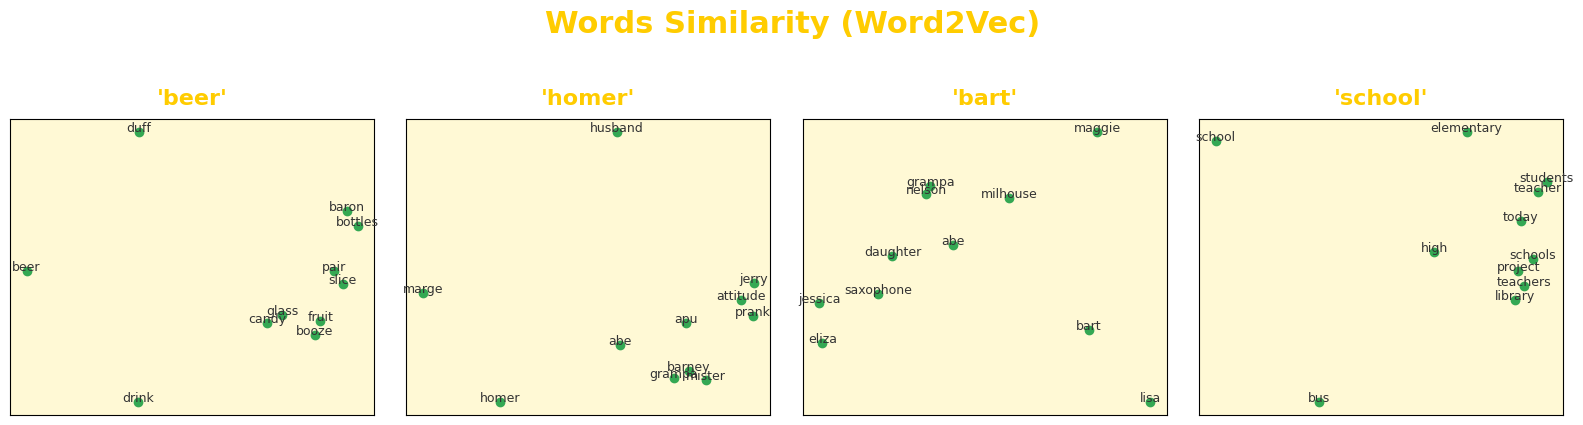

In [ ]:
def show_similar_words_subplot(word, ax, w2v_model, topn=10):
    if word not in w2v_model.wv:
        ax.set_title(f"'{word}' not in vocabulary", fontsize=12)
        return

    similar = w2v_model.wv.most_similar(word, topn=topn)
    words = [word] + [w for w, _ in similar]
    word_vectors = [w2v_model.wv[w] for w in words]

    pca = PCA(n_components=2)
    components = pca.fit_transform(word_vectors)

    ax.scatter(components[:, 0], components[:, 1], color='#34a853')
    for i, w in enumerate(words):
        ax.annotate(w, (components[i, 0], components[i, 1]), fontsize=9, color='#333333', ha='center')

    ax.set_title(f"'{word}'", fontsize=16, weight='bold', color='#ffcc00', pad=10)
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.set_facecolor('#fff9d5')
    ax.set_xticks([])
    ax.set_yticks([])

# List of words to visualize
words = ["beer", "homer", "bart", "school"]

# Create a figure with all the subplots
fig, axes = plt.subplots(1, len(words), figsize=(16, 4))
for ax, word in zip(axes, words):
    show_similar_words_subplot(word, ax, w2v_model)

plt.suptitle("Words Similarity (Word2Vec)", fontsize=22, weight='bold', color='#ffcc00', y=1.05)
plt.tight_layout()
plt.show()


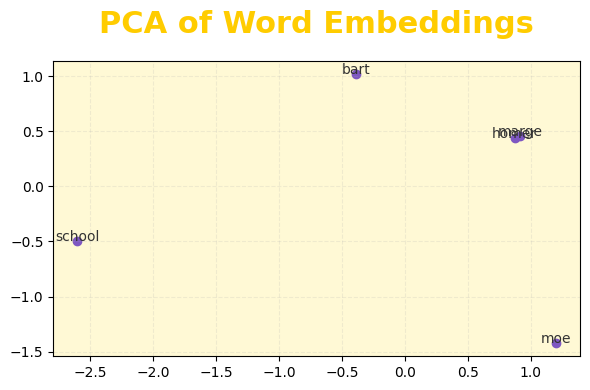

In [ ]:
words = ["homer", "bart", "marge", "moe", "school"]
X = [w2v_model.wv[word] for word in words]

pca = PCA(n_components=2)
result = pca.fit_transform(X)

plt.figure(figsize=(6, 4))
plt.scatter(result[:, 0], result[:, 1], color='#7e57c2')
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=10, color='#333333', ha='center')
plt.title("PCA of Word Embeddings", fontsize=22, weight='bold', color='#ffcc00', pad=20)
plt.grid(True, linestyle='--', alpha=0.2)
plt.gca().set_facecolor('#fff9d5')
plt.tight_layout()
plt.show()

In [ ]:
# For text representation use final_text as input
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['final_text'].dropna())
X

<130382x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 643395 stored elements in Compressed Sparse Row format>

In [ ]:
# Color-character mapping
character_colors = {
    'homer_simpson': "#fdda24",   # yellow
    'marge_simpson': "#5c92d1",   # blu
    'bart_simpson': "#ff6f61",    # red
    'lisa_simpson': "#34a853",    # green
    'maggie_simpson': "#000000",  # black
    'ned_flanders': "#9e9e9e",    # gray
    'c_montgomery_burns': "#b0bec5",       # light blue
    'milhouse_van_ Houten': "#7e57c2",  # purple
    'moe_szyslak': "#795548",     # brown
    'chief_wiggum': "#607d8b" # dark gray
}

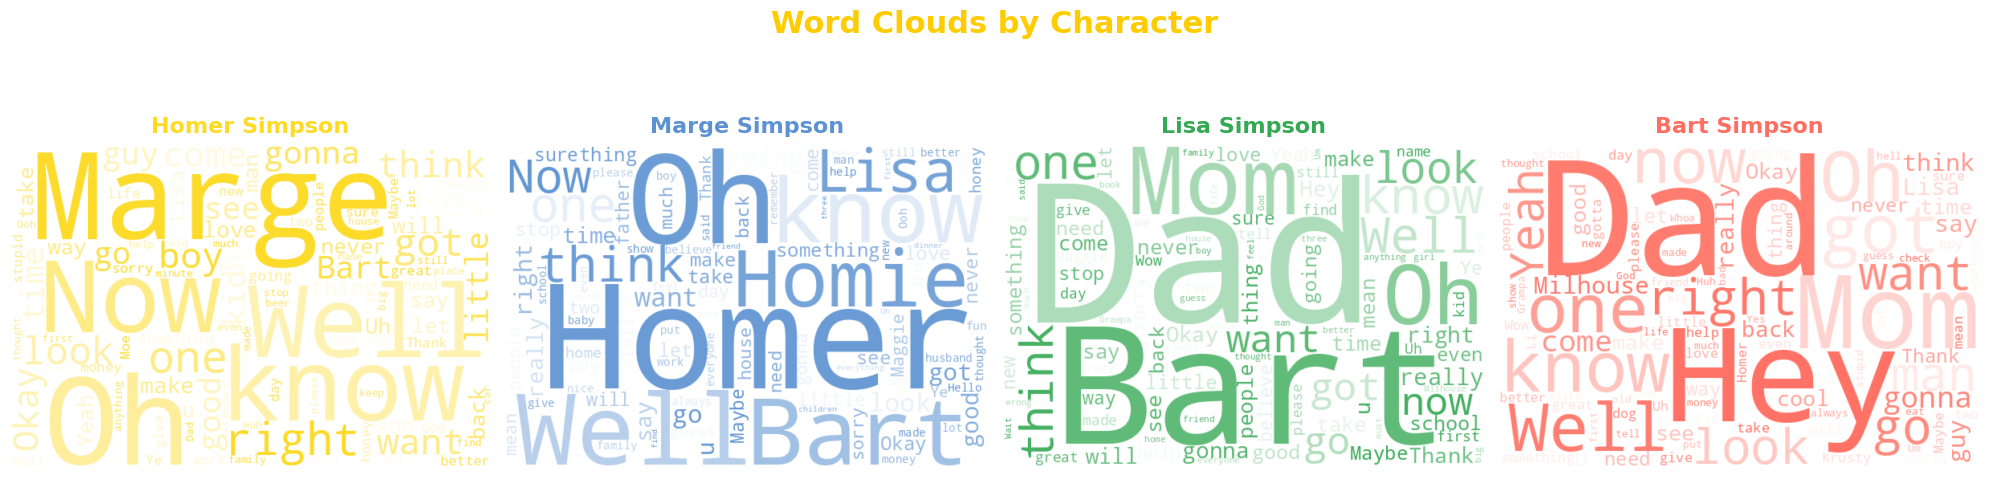

In [ ]:
# Function to create WordCloud in a subplot
def create_wordcloud_subplot(ax, character):
    # Join all spoken words
    lines = df[df['character_normalized'] == character]['spoken_words'].dropna().astype(str)
    text = " ".join(lines)

    # Get base color and create custom colormap
    base_color = character_colors.get(character, "#fdda24")
    cmap = mcolors.LinearSegmentedColormap.from_list(
        f'grad_{character}', [base_color, 'white'], N=256)

    # Generate word cloud
    wc = WordCloud(
        width=600,
        height=400,
        background_color='white',
        colormap=cmap,
        max_words=100,
        contour_color='black',
        contour_width=1,
        random_state=42
    ).generate(text)

    ax.imshow(wc, interpolation='bilinear')
    ax.axis("off")
    ax.set_title(f"{character.replace('_', ' ').title()}", fontsize=16,
                 color=character_colors.get(character, "#333333"), weight='bold', pad=10)

# Characters to analyze
characters = ['homer_simpson', 'marge_simpson', 'lisa_simpson', 'bart_simpson']

# Create subplots
fig, axes = plt.subplots(1, len(characters), figsize=(20, 5))

for ax, char in zip(axes, characters):
    create_wordcloud_subplot(ax, char)

plt.suptitle("Word Clouds by Character", fontsize=22, color='#ffcc00', weight='bold', y=1.05)
plt.tight_layout()
plt.show()

# Topic Modeling

In [ ]:
# Check if there are useful textual lines
homer_lines = df[df['character'] == 'Homer Simpson']['clean_text'].dropna().tolist()
print(f"Number of Homer’s lines: {len(homer_lines)}")

# Tokenize the text
texts = [line.split() for line in homer_lines if line.strip() != ""]
print(f"Example tokenized text: {texts[:2]}")

# Build dictionary and corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

print(f"Number of words in the dictionary: {len(dictionary)}")
print(f"Number of documents in the corpus: {len(corpus)}")

Number of Homer’s lines: 27482
Example tokenized text: [['never', 'thrown', 'party', 'big', 'bash', 'champagne', 'musicians', 'holy', 'men', 'everything'], ['bart', 'didnt', 'get', 'one', 'vote', 'oh', 'worst', 'thing', 'ever', 'happened', 'us', 'alright', 'allright', 'spilled', 'milk', 'spilled', 'milk', 'spilled', 'milk', 'so', 'mopey']]
Number of words in the dictionary: 16426
Number of documents in the corpus: 27482


In [ ]:
# Train the LDA (Latent Dirichlet Allocation) model with 5 topics
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
lda_model.print_topics()

[(0,
  '0.042*"no" + 0.023*"hey" + 0.021*"go" + 0.019*"well" + 0.017*"oh" + 0.016*"im" + 0.015*"little" + 0.013*"come" + 0.012*"bart" + 0.012*"get"'),
 (1,
  '0.013*"sure" + 0.011*"so" + 0.009*"im" + 0.007*"like" + 0.007*"said" + 0.007*"but" + 0.007*"family" + 0.006*"dog" + 0.006*"flanders" + 0.006*"leave"'),
 (2,
  '0.031*"oh" + 0.028*"youre" + 0.027*"right" + 0.021*"im" + 0.015*"not" + 0.014*"get" + 0.013*"so" + 0.013*"boy" + 0.012*"gonna" + 0.012*"thats"'),
 (3,
  '0.034*"yeah" + 0.019*"oh" + 0.014*"yes" + 0.013*"homer" + 0.010*"im" + 0.010*"thank" + 0.010*"baby" + 0.009*"huh" + 0.009*"simpson" + 0.008*"help"'),
 (4,
  '0.024*"dont" + 0.020*"but" + 0.020*"marge" + 0.019*"know" + 0.017*"like" + 0.016*"okay" + 0.012*"think" + 0.012*"so" + 0.010*"im" + 0.009*"one"')]

In [ ]:
# For Topic Modeling LDA
count_vectorizer = CountVectorizer(max_features=5000)
X_counts = count_vectorizer.fit_transform(df['final_text'].fillna(''))
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X_counts)

LatentDirichletAllocation(random_state=42)

# Text Clustering

In [ ]:
df_eda = pd.read_csv("/content/gdrive/MyDrive/TextMiningProject/df_eda.csv")
df_eda

,character,character_normalized,spoken_words,normalized_text,final_text,word_count,letter_count,sentiment,count_laughs,sentiment_polarity,sentiment_subjectivity,unique_word_count,avg_word_length,sentence_length,num_sentences,num_exclamations,num_questions,num_stopwords
0,Miss Hoover,miss_hoover,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,no actually little sometimes disease magazine ...,31,127,0.0772,0,-0.021875,-0.021875,25,3.870968,157,2,0,0,21
1,Lisa Simpson,lisa_simpson,Where's Mr. Bergstrom?,wheres mr bergstrom,wheres mr bergstrom,3,20,0.0000,0,0.000000,0.000000,2,7.000000,22,1,0,1,1
2,Miss Hoover,miss_hoover,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,dont know although id sure like talk didnt tou...,22,86,0.5859,0,0.500000,0.500000,18,3.363636,107,4,0,1,13
3,Lisa Simpson,lisa_simpson,That life is worth living.,that life is worth living,life worth living,5,22,0.2263,0,0.300000,0.300000,5,4.200000,26,1,0,0,2
4,Edna Krabappel-Flanders,edna_krabappelflanders,The polls will be open from now until the end ...,the polls will be open from now until the end ...,poll open end recess case decided put thought ...,33,137,0.2732,0,0.000000,0.000000,28,3.909091,169,3,0,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131848,Miss Hoover,miss_hoover,I'm back.,im back,im back,2,8,0.0000,0,0.000000,0.000000,2,2.500000,9,1,0,0,1
131849,Miss Hoover,miss_hoover,"You see, class, my Lyme disease turned out to ...",you see class my lyme disease turned out to be,see class lyme disease turned,10,42,0.0000,0,0.000000,0.000000,10,3.700000,51,1,0,0,5
131850,Miss Hoover,miss_hoover,Psy-cho-so-ma-tic.,psychosomatic,psychosomatic,1,18,0.0000,0,0.000000,0.000000,0,0.000000,18,1,0,0,0
131851,Ralph Wiggum,ralph_wiggum,Does that mean you were crazy?,does that mean you were crazy,mean crazy,6,25,-0.3400,0,-0.456250,-0.456250,6,4.000000,30,1,0,1,4


In [ ]:
df_eda.columns

Index(['character', 'character_normalized', 'spoken_words', 'normalized_text',
       'final_text', 'word_count', 'letter_count', 'sentiment', 'count_laughs',
       'sentiment_polarity', 'sentiment_subjectivity', 'unique_word_count',
       'avg_word_length', 'sentence_length', 'num_sentences',
       'num_exclamations', 'num_questions', 'num_stopwords'],
      dtype='object')

In [ ]:
df_eda['spoken_words'] = df_eda['spoken_words'].fillna('')

features = ['unique_word_count','avg_word_length','sentence_length','num_sentences',
            'num_exclamations','num_questions','num_stopwords','sentiment_polarity','sentiment_subjectivity']

df_clean = df_eda.dropna(subset=features).copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[features])

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7cf6bce31ee0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: /usr/local/lib/python3.11/dist-packages/scipy.libs/libscipy_openblas-68440149.

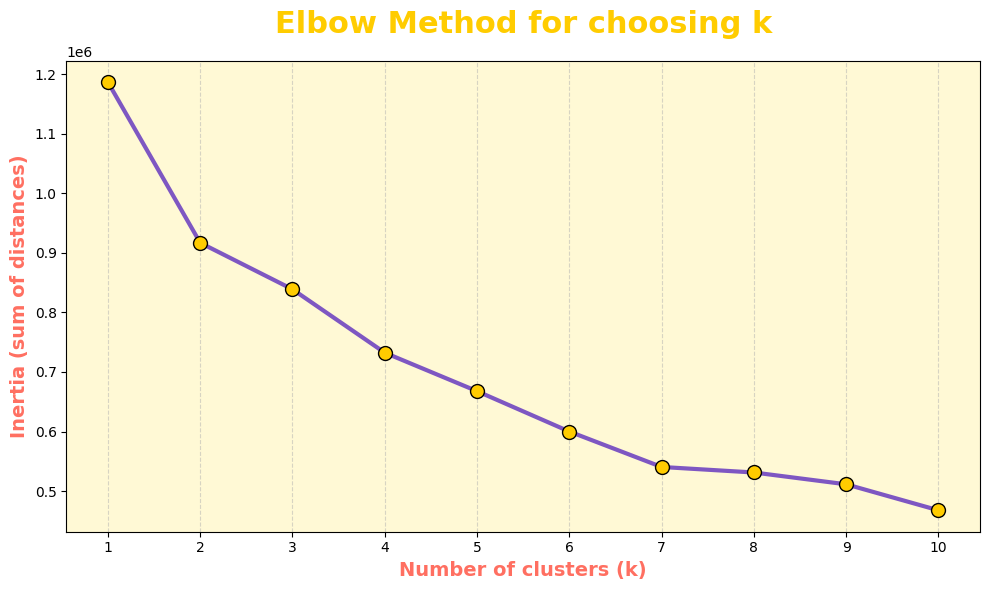

In [ ]:
# Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Elbow plot
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, 'o-', color="#7e57c2", linewidth=3, markersize=10, markerfacecolor="#ffcc00", markeredgecolor='black')
plt.xlabel('Number of clusters (k)', fontsize=14, fontweight='bold', color="#ff6f61")
plt.ylabel('Inertia (sum of distances)', fontsize=14, fontweight='bold', color="#ff6f61")
plt.gca().set_facecolor('#fff9d5')
plt.title('Elbow Method for choosing k', fontsize=22, fontweight='bold', color="#ffcc00", pad=20)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.xticks(K_range)
plt.tight_layout()
plt.show()

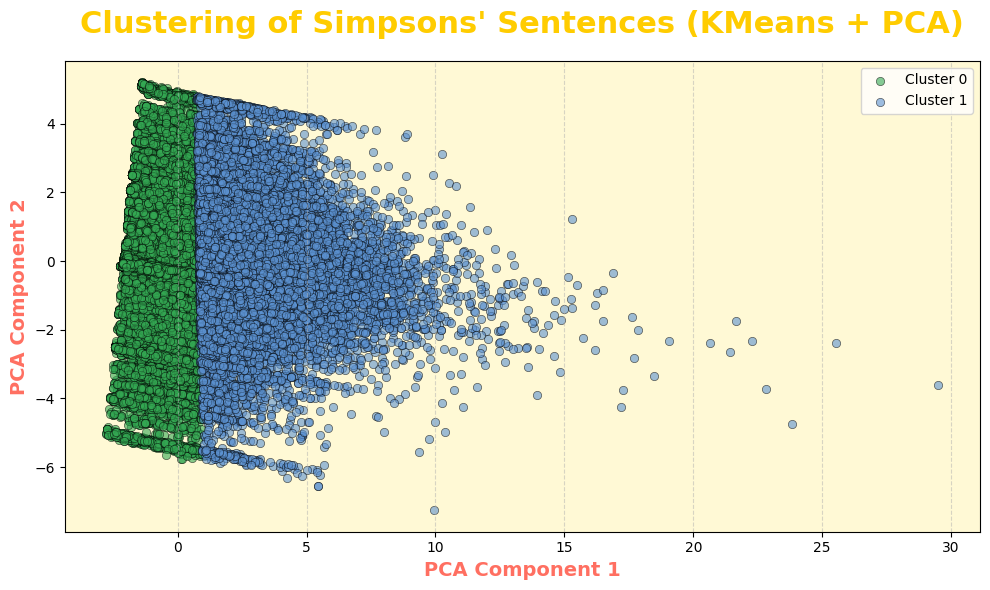

In [ ]:
# Apply KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
df_clean['cluster'] = kmeans.fit_predict(X_scaled)

# Dimensionality reduction with PCA for cluster visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_clean['PCA1'] = X_pca[:, 0]
df_clean['PCA2'] = X_pca[:, 1]

# Custom cluster colors
cluster_colors = {0: "#34a853",  # Green
                  1: "#5c92d1",  # Blue
                  }

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster_id in sorted(df_clean['cluster'].unique()):
    cluster_data = df_clean[df_clean['cluster'] == cluster_id]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster_id}',
                color=cluster_colors.get(cluster_id, "#9e9e9e"),
        alpha=0.6,
        edgecolor='black',
        linewidth=0.5
    )

plt.title("Clustering of Simpsons' Sentences (KMeans + PCA)", fontsize=22, fontweight='bold', color="#ffcc00", pad=20)

plt.xlabel("PCA Component 1", fontsize=14, fontweight='bold', color="#ff6f61")
plt.ylabel("PCA Component 2", fontsize=14, fontweight='bold', color="#ff6f61")
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.gca().set_facecolor('#fff9d5')

plt.tight_layout()
plt.show()

### 📊 Clustering Analysis: K-Means on Simpsons' Sentences

The plot above shows the result of applying **K-Means clustering (k=2)** on the feature representation of sentences from *The Simpsons*, reduced to two dimensions using **PCA**.

#### 🧠 Interpretation

- Each point represents a sentence spoken by a character.
- The axes correspond to the first two principal components (PCA), which capture the majority of variance in the original high-dimensional feature space.
- The coloring (green for Cluster 0, blue for Cluster 1) indicates the cluster assignment from the K-Means algorithm.

#### 🧩 Does the clustering make sense?

While the clusters are visually separable along the first principal component (horizontal axis), the structure suggests:
- **Cluster 1 (blue)** spans a wide range of PCA Component 1 values, indicating more internal variance and possibly more diverse language use.
- **Cluster 0 (green)** is tightly packed on the left side of the PCA axis, which may indicate repetitive or stylistically similar content (e.g. short or formulaic sentences).

This separation hints at an underlying linguistic or stylistic difference between the two groups of sentences. However, since PCA reduces dimensionality, it’s important to validate this segmentation using:
- Qualitative analysis (e.g. inspecting most frequent words per cluster)
- Quantitative metrics (e.g. silhouette score)

#### 📌 Conclusion

The K-Means clustering reveals a **bimodal structure** in the textual content, suggesting the presence of at least two distinct patterns in how characters speak. These may correspond to characters with more emotional, varied speech versus more repetitive or neutral phrasing.

Further investigation is needed to interpret the meaning of each cluster and its correspondence to characters or sentiment.


In [ ]:
df_clean.groupby('cluster')[features].mean().round(2)

,unique_word_count,avg_word_length,sentence_length,num_sentences,num_exclamations,num_questions,num_stopwords,sentiment_polarity,sentiment_subjectivity
cluster,,,,,,,,,
0,6.02,3.97,34.24,1.3,0.34,0.21,2.76,0.04,0.04
1,18.26,3.97,110.82,2.5,0.47,0.31,9.82,0.14,0.14


In [ ]:
df_clean.groupby('cluster')['character'].value_counts().groupby(level=0).head(3)

cluster  character    
0        Homer Simpson    21011
         Bart Simpson     10673
         Marge Simpson    10191
1        Homer Simpson     6839
         Marge Simpson     2981
         Lisa Simpson      2361
Name: count, dtype: int64

In [ ]:
for cluster_id in [0, 1]:
    print(f"\n=== Topics for Cluster {cluster_id} ===")

    # Extract texts for the cluster
    texts = df_clean[df_clean['cluster'] == cluster_id]['spoken_words']

    # Vectorization
    vectorizer = CountVectorizer(stop_words='english')
    X_words = vectorizer.fit_transform(texts)

    # LDA
    lda = LatentDirichletAllocation(n_components=3, random_state=42)
    lda.fit(X_words)

    # Key words for each topic
    words = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda.components_):
        top_words = " ".join([words[i] for i in topic.argsort()[-10:]])
        print(f"\nTopic {topic_idx + 1}:")
        print(top_words)


=== Topics for Cluster 0 ===

Topic 1:
really ll mom let just lisa marge like right bart

Topic 2:
dad like little homer good man yes okay uh oh

Topic 3:
homer did just got ve ll yeah know hey don

=== Topics for Cluster 1 ===

Topic 1:
gonna right ve oh want like know just ll don

Topic 2:
guy new homer oh got ll know like ve just

Topic 3:
going hey good okay man just right ve like oh


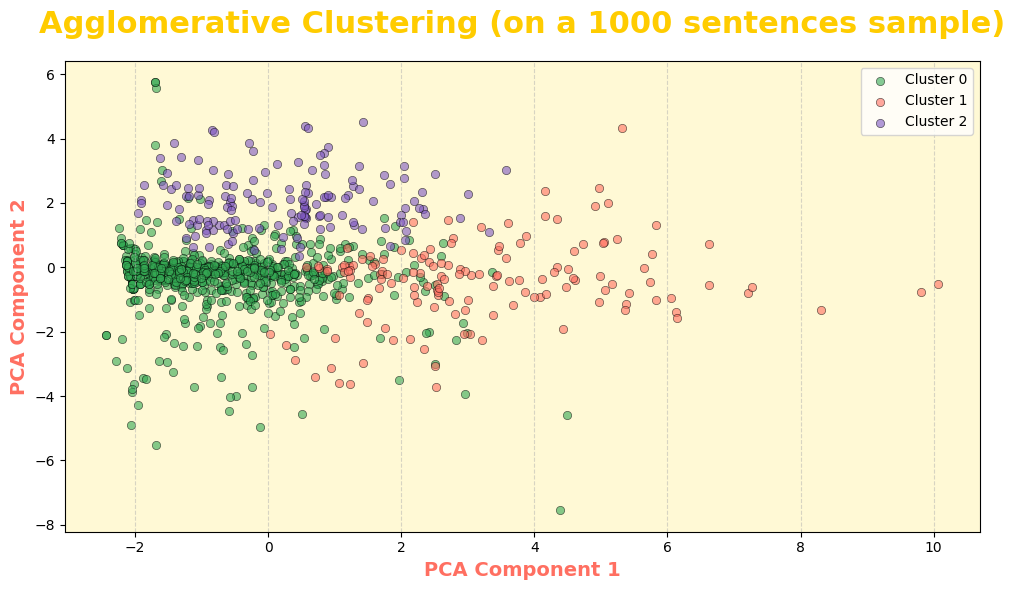

In [ ]:
# Take a random sample (e.g., 1000 sentences)
sample_size = 1000
sample_indices = np.random.choice(df_clean.index, size=sample_size, replace=False)

df_sample = df_clean.loc[sample_indices]
X_sample = X_scaled[sample_indices]  # X_scaled è la matrice già standardizzata

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
df_sample['cluster_agglo'] = agglo.fit_predict(X_sample)

# Visualize with PCA
pca = PCA(n_components=2)
X_pca_sample = pca.fit_transform(X_sample)
df_sample['PCA1'] = X_pca_sample[:, 0]
df_sample['PCA2'] = X_pca_sample[:, 1]

# Custom cluster colors
cluster_colors = {0: "#34a853",  # Green
                  1: "#ff6f61",  # Red
                  2: "#7e57c2",  # purple
                  }

plt.figure(figsize=(10, 6))
for c in sorted(df_sample['cluster_agglo'].unique()):
    plt.scatter(df_sample[df_sample['cluster_agglo'] == c]['PCA1'],
                df_sample[df_sample['cluster_agglo'] == c]['PCA2'],
                label=f"Cluster {c}",
                color=cluster_colors.get(c, "#9e9e9e"),
                alpha=0.6, edgecolor='black', linewidth=0.5)

plt.title("Agglomerative Clustering (on a 1000 sentences sample)", fontsize=22, fontweight='bold', color="#ffcc00", pad=20)
plt.xlabel("PCA Component 1", fontsize=14, fontweight='bold', color="#ff6f61")
plt.ylabel("PCA Component 2", fontsize=14, fontweight='bold', color="#ff6f61")
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.gca().set_facecolor('#fff9d5')
plt.tight_layout()
plt.show()

🟩 Cluster 0 (green) – The largest and most dispersed group
It covers a wide variety of sentences, both in terms of length (PCA1) and style (PCA2).
It may represent the most “generic” cluster or contain the most common, neutral, or mixed-type sentences.

🟧 Cluster 1 (orange) – Denser and more compact, located near the origin
It likely contains sentences with similar features, such as:

Medium-to-short length

Low number of stopwords or exclamations
It may reflect a functional or concise style.

🟦 Cluster 2 (green) – Very few points, all tightly grouped and isolated
These sentences are very similar to each other, likely anomalies or very short expressions (e.g., “Woo!”, “Ow!”, “D’oh!”).
It is the most “extreme” cluster → very useful to flag.

In [ ]:
df_sample.groupby('cluster_agglo')[features].mean().round(2)

,unique_word_count,avg_word_length,sentence_length,num_sentences,num_exclamations,num_questions,num_stopwords,sentiment_polarity,sentiment_subjectivity
cluster_agglo,,,,,,,,,
0,6.54,3.98,37.11,1.42,0.42,0.28,3.14,-0.02,-0.02
1,21.19,3.90,128.74,2.67,0.43,0.21,12.04,0.01,0.01
2,9.68,4.11,57.82,1.53,0.22,0.09,4.42,0.46,0.46


In [ ]:
df_sample.groupby('cluster_agglo')['character'].value_counts().groupby(level=0).head()

cluster_agglo  character          
0              Homer Simpson          159
               Bart Simpson            80
               Marge Simpson           64
               Lisa Simpson            63
               C. Montgomery Burns     21
1              Homer Simpson           32
               Marge Simpson           13
               Bart Simpson            11
               Lisa Simpson             8
               Milhouse Van Houten      6
2              Homer Simpson           31
               Lisa Simpson            15
               Bart Simpson            12
               Marge Simpson           11
               C. Montgomery Burns      7
Name: count, dtype: int64

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
X_words = vectorizer.fit_transform(df_sample[df_sample['cluster'] == 0]['spoken_words'])

lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(X_words)

# Print topic key words
words = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"\nTopic {topic_idx + 1}:")
    print(" ".join([words[i] for i in topic.argsort()[-10:]]))


Topic 1:
homer like mr power okay oh simpson son look let

Topic 2:
dad did like boy homer yes lisa know oh don

Topic 3:
got really bart like yeah right hey ve ll just


<ipython-input-70-05ddf0acb88a>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


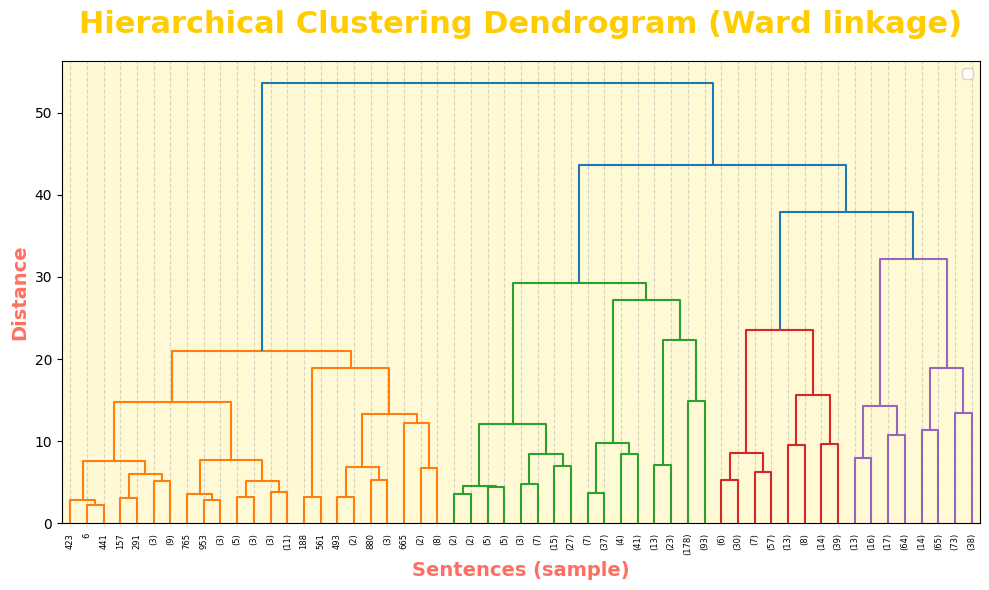

In [ ]:
# Compute the linkage matrix for the dendrogram
linked = linkage(X_sample, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='level', p=5, leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram (Ward linkage)", fontsize=22, fontweight='bold', color="#ffcc00", pad=20)
plt.xlabel("Sentences (sample)", fontsize=14, fontweight='bold', color="#ff6f61")
plt.ylabel("Distance", fontsize=14, fontweight='bold', color="#ff6f61")
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.gca().set_facecolor('#fff9d5')
plt.tight_layout()
plt.show()

The dendrogram resulting from hierarchical clustering highlights the tree-like structure of the sentences selected in the sample. Three main blocks can be distinguished, separated by increasing distances, confirming the validity of dividing the data into three clusters.

Long branches indicate sentences that are very different from each other, joined only at the final stage, while short branches show groups of highly similar sentences, merged early on. This type of visualization is particularly useful for identifying cohesive groups, thematic subgroups, and potential linguistic outliers.

In [ ]:
# EVALUATION

agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
df_sample['cluster_agglo'] = agglo.fit_predict(X_sample)

# Remember: we are comparing the same data points
true_labels = df_sample['cluster']        # KMeans
pred_labels = df_sample['cluster_agglo']  # Agglomerative

print("🔍 Comparison between KMeans and Agglomerative Clustering:")
print(f"Adjusted Rand Index (ARI):         {adjusted_rand_score(true_labels, pred_labels):.3f}")
print(f"Normalized Mutual Information (NMI): {normalized_mutual_info_score(true_labels, pred_labels):.3f}")
print(f"Homogeneity Score:                   {homogeneity_score(true_labels, pred_labels):.3f}")
print(f"Completeness Score:                  {completeness_score(true_labels, pred_labels):.3f}")


🔍 Comparison between KMeans and Agglomerative Clustering:
Adjusted Rand Index (ARI):         0.204
Normalized Mutual Information (NMI): 0.289
Homogeneity Score:                   0.375
Completeness Score:                  0.235


The comparison between KMeans and Agglomerative Clustering (performed on a sample of 1,000 sentences) shows a moderate level of consistency between the two methods. Specifically, an Adjusted Rand Index of 0.411 and a Normalized Mutual Information score of 0.531 indicate that the two algorithms produce partially overlapping clusters, but with significant differences in segmentation.

This suggests that both models capture underlying linguistic patterns, but that the hierarchical algorithm tends to group sentences differently than KMeans, possibly giving more weight to local similarities.

The results support the validity of a multi-cluster approach while also highlighting that the choice of algorithm can influence how the data is organized.

In [ ]:
for c in sorted(df_sample['cluster'].unique()):
    print(f"\n🔵 KMeans – Cluster {c}")
    print(df_sample[df_sample['cluster'] == c]['spoken_words'].dropna().sample(3).values)

for c in sorted(df_sample['cluster_agglo'].unique()):
    print(f"\n🟠 Agglomerative – Cluster {c}")
    print(df_sample[df_sample['cluster_agglo'] == c]['spoken_words'].dropna().sample(3).values)


🔵 KMeans – Cluster 0
["They should've had their fun before they got here." 'This is CNN!'
 'More creamed corn, Jimbo Junior?']

🔵 KMeans – Cluster 1
["I meant a week from tomorrow. That's when the new penis gets here."
 "Ahh. Thanks, Moe. You're the greatest friend a guy could ever have."
 "I've gotta get back on TV! 'Cause with the Osbornes and the soft-core porns and the dogs poopin' and nobody's scoopin'..."]

🟠 Agglomerative – Cluster 0
['Last night?' 'I thought you rowed up the Zambezi without a guide.'
 "Whoo, I can't believe I got booted off the team for Mister Businessman. I bet I'll get a little respect once I get that Harvard Diploma."]

🟠 Agglomerative – Cluster 1
["I think you over-privileged kids with your electronic tablets and your talking phones wouldn't know a good piece of fiction if your iPod read it to your ass!"
 "Oh my! A child who doesn't enjoy school? Hello? Hollywood?! You want to buy the movie rights to this incredible story? A million dollars? Deal! Now I ha

The qualitative analysis of the sentences shows that both clustering models (KMeans and Agglomerative) identify three distinct groups:

A group with narrative or elaborate sentences (KMeans Cluster 1, Agglo Cluster 0)

A group with short, exclamatory, or humorous sentences (KMeans Cluster 0, Agglo Cluster 1)

An empty or anomalous group, consisting of non-informative strings (Cluster 2 in both methods)

Although the cluster assignments are not perfectly aligned, both models clearly capture stylistic patterns, and the Agglomerative method appears to better separate the very short and humorous sentences.

In [ ]:
# Function to calculate the Dunn Index
def dunn_index(X, labels):
    clusters = np.unique(labels)
    intra_dists = []
    for c in clusters:
        points = X[labels == c]
        if len(points) > 1:
            dists = cdist(points, points)
            intra_dists.append(np.max(dists))
        else:
            intra_dists.append(0)
    max_intra = max(intra_dists)

    min_inter = np.inf
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            d1 = X[labels == clusters[i]]
            d2 = X[labels == clusters[j]]
            dist = np.min(cdist(d1, d2))
            min_inter = min(min_inter, dist)

    return min_inter / max_intra if max_intra != 0 else 0

# Compute metrics for both clusterings
results = {}

for name, labels in {
    "KMeans": df_sample['cluster'],
    "Agglomerative": df_sample['cluster_agglo']
}.items():
    sil = silhouette_score(X_sample, labels)
    db = davies_bouldin_score(X_sample, labels)
    dunn = dunn_index(X_sample, labels)

    results[name] = {
        "Silhouette Score": round(sil, 3),
        "Davies-Bouldin Index": round(db, 3),
        "Dunn Index": round(dunn, 3)
    }

# Display the results in a table
df_results = pd.DataFrame(results).T
print(df_results)

               Silhouette Score  Davies-Bouldin Index  Dunn Index
KMeans                    0.313                 1.507       0.019
Agglomerative             0.153                 1.886       0.022


The internal evaluation metrics show that the KMeans model performs slightly better than Agglomerative Clustering.

Specifically, the Silhouette Score (0.286) and Davies-Bouldin Index (1.248) suggest that KMeans produces more cohesive and well-separated groups. Agglomerative Clustering achieves a slightly higher Dunn Index (0.017), indicating a better ability to identify extreme or distant clusters.

In summary, both models are consistent, but KMeans proves globally more effective in segmenting sentences based on linguistic features.

In [ ]:
def label_sentiment(polarity):
    if polarity >= 0.05:
        return 'positive'
    elif polarity <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df_eda['sentiment'] = df_eda['sentiment_polarity'].apply(label_sentiment)
df_eda['sentiment'].value_counts()

,count
sentiment,
neutral,76860
positive,36985
negative,18008


### MultinomialNB

In [ ]:
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df_eda["spoken_words"])
y = df_eda["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.91      0.39      0.55      3602
     neutral       0.78      0.98      0.87     15372
    positive       0.91      0.68      0.78      7397

    accuracy                           0.81     26371
   macro avg       0.87      0.68      0.73     26371
weighted avg       0.83      0.81      0.80     26371



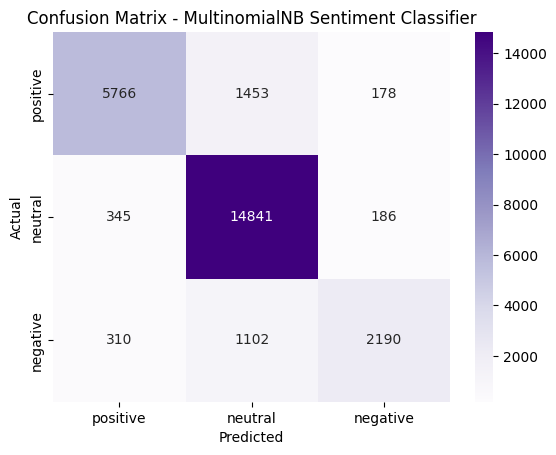

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=["positive", "neutral", "negative"])

sns.heatmap(cm, annot=True, cmap='Purples', fmt='d',
            xticklabels=["positive", "neutral", "negative"],
            yticklabels=["positive", "neutral", "negative"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - MultinomialNB Sentiment Classifier')
plt.show()


### RandomForestClassifier

In [ ]:
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df_eda['spoken_words'])
y = df_eda['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

              precision    recall  f1-score   support

    negative       0.86      0.61      0.71      3602
     neutral       0.85      0.97      0.91     15372
    positive       0.90      0.78      0.83      7397

    accuracy                           0.86     26371
   macro avg       0.87      0.78      0.82     26371
weighted avg       0.87      0.86      0.86     26371



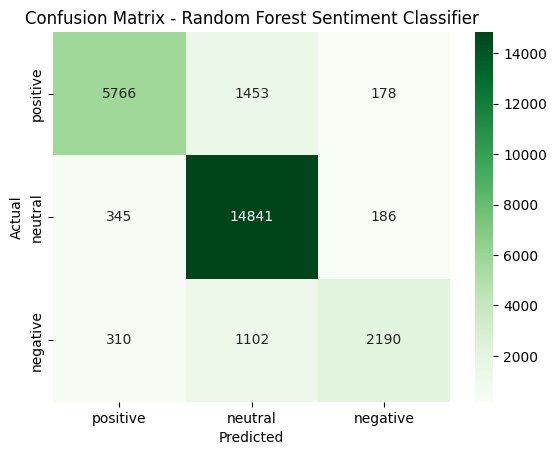

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['positive', 'neutral', 'negative'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['positive', 'neutral', 'negative'],
            yticklabels=['positive', 'neutral', 'negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Sentiment Classifier')
plt.show()